In [ ]:
# default_exp ds.description.eval.traceability

# Empirical Methods for Software Traceability: Description

> This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets by using the theory of information transmission.
> Implementing descriptive analysis
> Author: @danaderp Feb 2021

Software Traceability is analyzed in three classes of tasks ways: description, prediction, and causal inference. 

## Description:
### Descriptive Analysis of Traceability Distance

### Descriptive Analysis of Information Transmission


 
We rely on information theory and manifold analysis to evaluate software retrieval unsupervised:
- Information Theory for Software Information Retrieval (Shared Information and Mutual Information)
- Prototypes and Criticisms for Paragraph Vectors 

## Case Studies of Info Transmission Traceability
- Case 0: Overlapping Information
- Case 1: Edge Cases of Self-Information
- Case 2: Minimum and maximum loss
- Case 3: Minimum and maximum noise
- Case 4: Orphan informative links

In [ ]:
#export
import ds4se as ds
from ds4se.mining.ir import VectorizationType
from ds4se.mining.ir import SimilarityMetric
from ds4se.mining.ir import EntropyMetric

In [ ]:
#export
import numpy as np

In [ ]:
#export
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os
from enum import Enum, unique, auto

In [ ]:
#export
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
#export
import scipy as sc

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Loading Experiments

In [ ]:
#experiment 1.0.2/3
experiment = 'experiments1.0.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def sacp_params():
    return{
        "system": 'sacp',
        "experiment_path_w2v": path_data + '[sacp-python-common-VectorizationType.word2vec-LinkType.issue2src-True-1611712985.443235].csv',
        "experiment_path_d2v": path_data + '[sacp-python-common-VectorizationType.doc2vec-LinkType.issue2src-True-1609009631.599384].csv',
        'saving_path': '../../'+'data/cisco/sacp_data/',
        'system_long': 'sacp-python-common',
        'timestamp': 1609224778.517111,
        'language': 'all-corpus'
    }   

In [ ]:
params = sacp_params()
#params = sacp_params()

params['experiment_path_w2v']

'../dvc-ds4se/metrics/traceability/experiments1.0.x/[sacp-python-common-VectorizationType.word2vec-LinkType.issue2src-True-1611712985.443235].csv'

In [ ]:
%matplotlib inline

In [ ]:
#export
class VectorEvaluation():
    '''Approaches Common Evaluations and Interpretations (statistical analysis)
       Loading unsupervised results
       w2v includes entropy evaluation
    '''
    def __init__(self, params):
        self.params = params
        self.df_w2v = pd.read_csv(params['experiment_path_w2v'], header=0, index_col=0, sep=' ')
        self.df_d2v = pd.read_csv(params['experiment_path_d2v'], header=0, index_col=0, sep=' ')
        
        self.sim_list_w2v = [SimilarityMetric.SCM_sim, SimilarityMetric.WMD_sim]
        self.sim_list_d2v = [SimilarityMetric.COS_sim , SimilarityMetric.EUC_sim]
        
        
        
        #Entropy
        manifoldEntropy =  self.sim_list_w2v + [EntropyMetric.Entropy_src, EntropyMetric.Entropy_tgt, 
                           EntropyMetric.JI, EntropyMetric.MI, EntropyMetric.Loss, 
                           EntropyMetric.Noise]
        manifoldEntropy = [str(i) for i in manifoldEntropy] + ['Linked?']
        self.manifoldEntropy = self.df_w2v[manifoldEntropy].copy()

        ##Concat D2V
        for i in self.sim_list_d2v:
            self.manifoldEntropy[ str(i) ] = self.df_d2v[str(i)].values
        
        self.manifoldEntropy = self.manifoldEntropy[~self.manifoldEntropy.isin([np.nan, np.inf, -np.inf]).any(1)]
        
        #SharedInfo
        sharedInfo = self.sim_list_w2v +[EntropyMetric.MSI_I,EntropyMetric.MSI_X]
        sharedInfo = [str(i) for i in sharedInfo] + ['Linked?']
        self.sharedInfo = self.df_w2v[sharedInfo].copy()
        
        for i in self.sim_list_d2v:
            self.sharedInfo[ str(i) ] = self.df_d2v[ str(i) ].values #No filtered by nans
            
        self.df_sys = self.LoadCorpus(params['timestamp'], language=params['language'], sep='~')
            
    def LoadCorpus(self, timestamp, language='js', sep=',', mode='a'):
        path_to_link = self.params['saving_path'] + '['+ self.params['system_long']  + '-' + language + '-{}].csv'.format(timestamp)
        return pd.read_csv(path_to_link, header=0, index_col=0, sep=sep)

In [ ]:
#tst
test_vector_eval = VectorEvaluation(params)

In [ ]:
#tst
test_vector_eval.df_w2v.shape

(21312, 15)

In [ ]:
#tst 
test_vector_eval.df_d2v.shape

(21312, 10)

In [ ]:
assert test_vector_eval.df_w2v.Source[0] == test_vector_eval.df_d2v.Source[0]

In [ ]:
assert test_vector_eval.df_w2v.Target[0] == test_vector_eval.df_d2v.Target[0]

In [ ]:
assert test_vector_eval.df_w2v.Source[1091] == test_vector_eval.df_d2v.Source[1091]

In [ ]:
assert test_vector_eval.df_w2v.Target[1091] == test_vector_eval.df_d2v.Target[1091]

In [ ]:
#tst
test_vector_eval.manifoldEntropy.head(2)

SimilarityMetric.SCM_sim  SimilarityMetric.WMD_sim  \
0                  0.246750                  0.458403   
1                  0.229627                  0.452244   

   EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
0                   4.715814                   6.895876           6.97673   
1                   4.715814                   7.046810           7.10597   

   EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  \
0          4.634960            2.260916             0.080854      0.0   
1          4.656654            2.390156             0.059159      0.0   

   SimilarityMetric.COS_sim  SimilarityMetric.EUC_sim  
0                 -0.022726                  0.982185  
1                  0.046708                  0.982750

In [ ]:
#tst
test_vector_eval.sharedInfo.head(2)

SimilarityMetric.SCM_sim  SimilarityMetric.WMD_sim  EntropyMetric.MSI_I  \
0                  0.246750                  0.458403             3.022055   
1                  0.229627                  0.452244             3.084963   

   EntropyMetric.MSI_X  Linked?  SimilarityMetric.COS_sim  \
0             1.335963      0.0                 -0.022726   
1             1.348006      0.0                  0.046708   

   SimilarityMetric.EUC_sim  
0                  0.982185  
1                  0.982750

In [ ]:
#Sys
test_vector_eval.df_sys.head(2)

ids                                               text type  \
0  295  Production Merge * Feed release name through t...   pr   
1  294  Add test fields for DARE push * Added test dat...   pr   

                                                conv  \
0  product merg feed releas name upload bom allow...   
1  add test field dare push test data json sent d...   

                                               bpe8k  \
0  ['▁production', '▁mer', 'ge', '▁*', '▁feed', '...   
1  ['▁add', '▁test', '▁fields', '▁for', '▁d', 'ar...   

                                              bpe32k  \
0  ['▁production', '▁merge', '▁*', '▁feed', '▁rel...   
1  ['▁add', '▁test', '▁fields', '▁for', '▁dare', ...   

                                             bpe128k  
0  ['▁production', '▁merge', '▁*', '▁feed', '▁rel...  
1  ['▁add', '▁test', '▁fields', '▁for', '▁dare', ...

In [ ]:
test_vector_eval.df_sys.groupby(['type']).size().reset_index(name='counts')

type  counts
0   pr     288
1   py      74

#  Data Science Description Task
Classification/evaluation metrics for highly imbalanced data [(see Forum)](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data).
Description is using data to provide a quantitative summary of certain features of the world. Descriptive tasks include, for example, computing the proportion of individuals with diabetes in a large healthcare database and representing social networks in a community. The analytics employed for description range from elementary calculations (e.g., a mean or a proportion) to sophisticated techniques such as unsupervised learning algorithms (e.g., cluster analysis) and clever data visualizations.

In [ ]:
#export
class ExploratoryDataSoftwareAnalysis(VectorEvaluation):
    '''
    This class process "Description" Data Science Techniques
    '''
    def __init__(self, params):
        super().__init__(params)
        
        descriptors = {
            "entropy_set":['Linked?','EntropyMetric.Entropy_src','EntropyMetric.Entropy_tgt','EntropyMetric.JI','EntropyMetric.MI', 'EntropyMetric.Loss', 'EntropyMetric.Noise'],
            "similarity_set":['Linked?','SimilarityMetric.SCM_sim', 'SimilarityMetric.WMD_sim', 'SimilarityMetric.COS_sim', 'SimilarityMetric.EUC_sim' ],
            "shared_set":['Linked?','EntropyMetric.MSI_I', 'EntropyMetric.MSI_X']
        }
        
        self.entropy_set = self.manifoldEntropy[descriptors['entropy_set']].copy()
        self.similarity_set = self.manifoldEntropy[descriptors['similarity_set']].copy()
        self.shared_set = self.sharedInfo[descriptors['shared_set']].copy()
        
    def mean_confidence_interval(self, data, confidence=0.95):
        a = 1.0 * np.array(data)
        n = len(a)
        m, se = np.mean(a), sc.stats.sem(a)
        h = se * sc.stats.t.ppf((1 + confidence) / 2., n-1)
        return round(m,2), round(m-h,2), round(m+h,2), round(h,2)
    
    def bootstrapping_mean(self, vector, samples=10000, size = 500 ):
        '''Confidence Intervals are  Statistical test performed visully'''
        np.random.seed(42)
        mean = []
        for i in range(samples):
            boot = np.random.choice(vector, size=size)
            mean += [np.mean(boot)]
            pass
        
        return mean

    def bootstrapping_plot(self,df,size=20, samples=500, color='b', params = ['Linked?']):
        pd.plotting.bootstrap_plot(
            df[params],
            size=size,
            samples=samples,
            color=color
        )
        pass    
    
    def confidence_interval_plot(self, 
                                 list_category, 
                                 list_low, 
                                 list_up,
                                 color,
                                 byLink = False
                                ):
        data_dict = {}
        data_dict['category'] = list_category
        data_dict['lower'] = list_low
        data_dict['upper'] = list_up
        dataset = pd.DataFrame(data_dict)
        for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
            #Todo please modify this orange
            if byLink:
                #logging.info(str(y))
                plt.plot((lower,upper),(y,y),'o',color=color[y%2])
            else:
                plt.plot((lower,upper),(y,y),'o',color=color[0])
        plt.yticks(range(len(dataset)),list(dataset['category']))
        plt.grid()
        plt.show()
        pass
    
    def __bootstrapping_iter(
                                self,
                                df,
                                samples=10000, 
                                conf=0.95
                                ):
        list_category = []
        list_low = []
        list_up =[]
        for column_name, item in df.iteritems():
            m = self.bootstrapping_mean(
                item.values,
                samples=10000, 
                size=len(item.values) #Size is by default the same size of the original sample
                )
            ci = self.mean_confidence_interval(m, conf)
            list_category += [column_name]
            list_low += [ci[1]]
            list_up += [ci[2]]
            logging.info(column_name + ' : ' + str(ci))
        return list_category, list_low, list_up
    
    def ci_bootstrapping(self,
                         df, 
                         samples=10000, 
                         conf=0.95, 
                         color=['blue','red'],
                         byLink = False
                        ):
        '''Main method for generating bootstrapping CIs'''
        list_category = []
        list_low = []
        list_up = []
        
        if byLink:
            list_category_1,list_low_1,list_up_1 = self.__bootstrapping_iter(
                                df[df['Linked?']== 1], samples, conf)
            list_category_0,list_low_0,list_up_0 = self.__bootstrapping_iter(
                                df[df['Linked?']== 0], samples, conf)                       
            color_ = []
            for index in range(len(list_category_0)):
                list_category += [list_category_1[index]+'_1',list_category_0[index]+'_0']
                list_low += [list_low_1[index], list_low_0[index]]
                list_up += [list_up_1[index], list_up_0[index]]
                
                if index%2 == 0:
                    color_.insert(index,color[0])
                else:
                    color_.insert(index,color[1])
                pass
                                  
            self.confidence_interval_plot(list_category,list_low,list_up,color_,byLink)
            
        else:
            list_category,list_low,list_up = self.__bootstrapping_iter(
                                df, samples, conf)
            self.confidence_interval_plot(list_category,list_low,list_up,color)
        
        pass

In [ ]:
EDA = ExploratoryDataSoftwareAnalysis( params = params ) #<---- Parameter 

## [1] Descriptive Statistics

### Distance and Similarity

In [ ]:
EDA.similarity_set.describe().round(2)

Linked?  SimilarityMetric.SCM_sim  SimilarityMetric.WMD_sim  \
count  21312.00                  21312.00                  21312.00   
mean       0.03                      0.28                      0.47   
std        0.16                      0.16                      0.02   
min        0.00                      0.00                      0.43   
25%        0.00                      0.16                      0.45   
50%        0.00                      0.26                      0.47   
75%        0.00                      0.39                      0.48   
max        1.00                      0.83                      0.64   

       SimilarityMetric.COS_sim  SimilarityMetric.EUC_sim  
count                  21312.00                  21312.00  
mean                       0.00                      0.98  
std                        0.05                      0.00  
min                       -0.18                      0.98  
25%                       -0.03                      0.98  
50%                        0.00                      0.98  
75%                        0.03                      0.98  
max                        0.15                      0.98

In [ ]:
EDA.similarity_set.groupby(['Linked?']).agg(['count','mean','std','median']).round(2)

SimilarityMetric.SCM_sim                    SimilarityMetric.WMD_sim  \
                           count  mean   std median                    count   
Linked?                                                                        
0.0                        20765  0.28  0.16   0.26                    20765   
1.0                          547  0.28  0.16   0.26                      547   

                           SimilarityMetric.COS_sim                    \
         mean   std median                    count mean   std median   
Linked?                                                                 
0.0      0.47  0.02   0.47                    20765  0.0  0.05    0.0   
1.0      0.47  0.03   0.47                      547  0.0  0.04    0.0   

        SimilarityMetric.EUC_sim                    
                           count  mean  std median  
Linked?                                             
0.0                        20765  0.98  0.0   0.98  
1.0                          547  0.98  0.0   0.98

### Information Transmission

In [ ]:
EDA.entropy_set.describe().round(2)

Linked?  EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  \
count  21312.00                   21312.00                   21312.00   
mean       0.03                       4.68                       6.60   
std        0.16                       1.35                       0.45   
min        0.00                       1.00                       4.27   
25%        0.00                       3.83                       6.41   
50%        0.00                       4.89                       6.56   
75%        0.00                       5.68                       6.87   
max        1.00                       7.50                       7.44   

       EntropyMetric.JI  EntropyMetric.MI  EntropyMetric.Loss  \
count          21312.00          21312.00            21312.00   
mean               6.76              4.52                2.08   
std                0.36              1.25                1.27   
min                4.31              0.87               -0.79   
25%                6.54              3.68                1.12   
50%                6.76              4.74                1.82   
75%                6.98              5.44                2.88   
max                7.80              7.37                6.44   

       EntropyMetric.Noise  
count             21312.00  
mean                  0.17  
std                   0.25  
min                  -0.86  
25%                   0.03  
50%                   0.08  
75%                   0.20  
max                   3.28

In [ ]:
EDA.entropy_set.groupby(['Linked?']).agg(['count','mean','std','median']).round(2)

EntropyMetric.Entropy_src                     \
                            count  mean   std median   
Linked?                                                
0.0                         20765  4.68  1.35   4.88   
1.0                           547  4.94  1.20   5.18   

        EntropyMetric.Entropy_tgt                    EntropyMetric.JI        \
                            count  mean   std median            count  mean   
Linked?                                                                       
0.0                         20765  6.59  0.45   6.56            20765  6.76   
1.0                           547  6.72  0.46   6.76              547  6.87   

         ... EntropyMetric.MI        EntropyMetric.Loss                     \
         ...              std median              count  mean   std median   
Linked?  ...                                                                 
0.0      ...             1.25   4.73              20765  2.08  1.28   1.83   
1.0      ...             1.12   5.05                547  1.93  1.19   1.70   

        EntropyMetric.Noise                     
                      count  mean   std median  
Linked?                                         
0.0                   20765  0.17  0.24   0.09  
1.0                     547  0.16  0.26   0.08  

[2 rows x 24 columns]

### Shared Information

In [ ]:
EDA.shared_set.describe().round(2)

Linked?  EntropyMetric.MSI_I  EntropyMetric.MSI_X
count  21312.00             20143.00             20143.00
mean       0.03                 3.17                 1.24
std        0.16                 1.44                 0.35
min        0.00                 0.00                 0.00
25%        0.00                 2.32                 1.27
50%        0.00                 3.38                 1.36
75%        0.00                 4.26                 1.40
max        1.00                 6.53                 1.43

In [ ]:
EDA.shared_set.groupby(['Linked?']).agg(['count','mean','std','median']).round(2)

EntropyMetric.MSI_I                    EntropyMetric.MSI_X        \
                      count  mean   std median               count  mean   
Linked?                                                                    
0.0                   19612  3.16  1.44   3.38               19612  1.24   
1.0                     531  3.59  1.26   3.75                 531  1.31   

                      
          std median  
Linked?               
0.0      0.35   1.36  
1.0      0.26   1.38

## [2] Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28cb571668>,
      dtype=object)

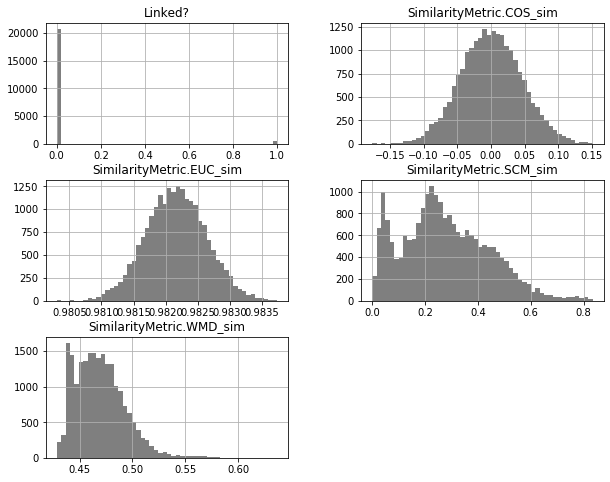

In [ ]:
EDA.similarity_set.hist(color='k', bins=50, figsize=[10,8], alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28cb144438>,
      dtype=object)

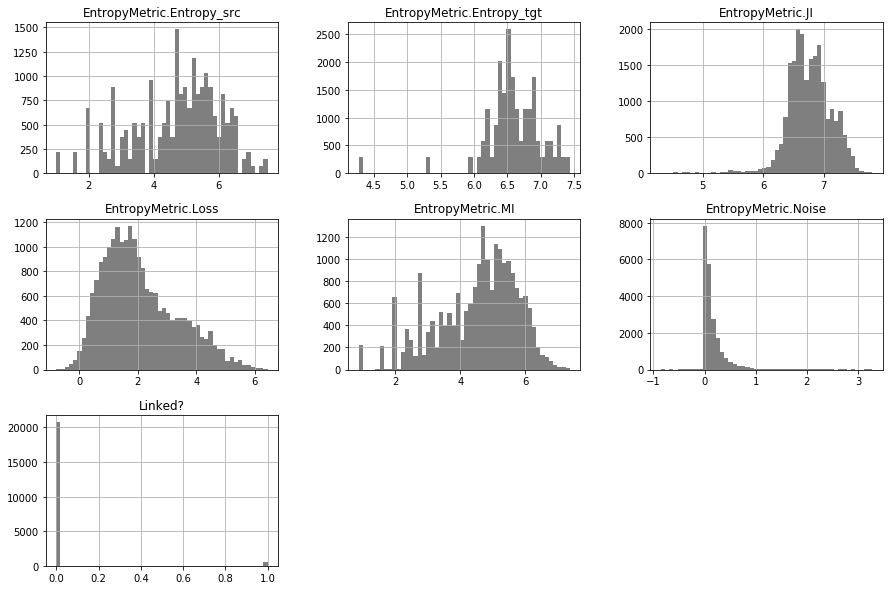

In [ ]:
EDA.entropy_set.hist(color='k', bins=50, figsize=[15,10], alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28c2797ac8>,
      dtype=object)

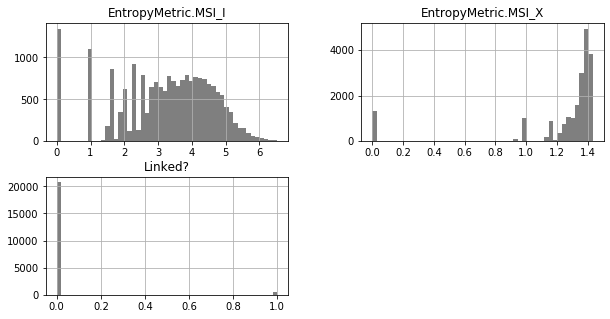

In [ ]:
EDA.shared_set.hist(color='k', bins=50, figsize=[10,5], alpha=0.5)

The following sections are focused on the three common error bars: standard deviations, confidence intervals, and stardard errors

## [3] Confidence Intervals 
Confidence Intervals. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range. The confidence level is chosen by the investigator. For a given estimation in a given sample, using a higher confidence level generates a wider (i.e., less precise) confidence interval. In general terms, a confidence interval for an unknown parameter is based on sampling the distribution of a corresponding estimator

We use bootstrapping! Bootstrapping is a robust technique. We use it for calculating the mean and standard error. 

### Distance & Similarity Measures

2021-03-10 03:23:48,008 : INFO : Linked? : (0.03, 0.03, 0.03, 0.0)
2021-03-10 03:23:51,877 : INFO : SimilarityMetric.SCM_sim : (0.28, 0.28, 0.28, 0.0)
2021-03-10 03:23:55,684 : INFO : SimilarityMetric.WMD_sim : (0.47, 0.47, 0.47, 0.0)
2021-03-10 03:23:59,469 : INFO : SimilarityMetric.COS_sim : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:24:03,313 : INFO : SimilarityMetric.EUC_sim : (0.98, 0.98, 0.98, 0.0)


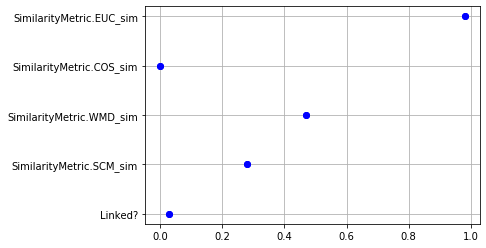

In [ ]:
#Distance & Similarity Measures
EDA.ci_bootstrapping(df = EDA.similarity_set, samples=10000, conf=0.95 )

2021-03-10 03:24:03,936 : INFO : Linked? : (1.0, 1.0, 1.0, 0.0)
2021-03-10 03:24:04,404 : INFO : SimilarityMetric.SCM_sim : (0.28, 0.28, 0.28, 0.0)
2021-03-10 03:24:04,872 : INFO : SimilarityMetric.WMD_sim : (0.47, 0.47, 0.47, 0.0)
2021-03-10 03:24:05,350 : INFO : SimilarityMetric.COS_sim : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:24:05,820 : INFO : SimilarityMetric.EUC_sim : (0.98, 0.98, 0.98, 0.0)
2021-03-10 03:24:09,664 : INFO : Linked? : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:24:13,572 : INFO : SimilarityMetric.SCM_sim : (0.28, 0.28, 0.28, 0.0)
2021-03-10 03:24:17,429 : INFO : SimilarityMetric.WMD_sim : (0.47, 0.47, 0.47, 0.0)
2021-03-10 03:24:21,261 : INFO : SimilarityMetric.COS_sim : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:24:25,144 : INFO : SimilarityMetric.EUC_sim : (0.98, 0.98, 0.98, 0.0)


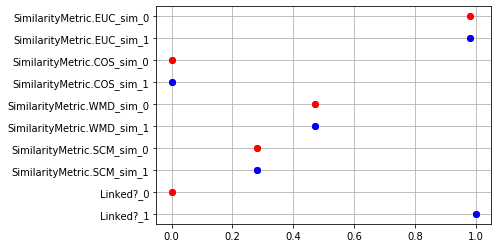

In [ ]:
EDA.ci_bootstrapping(df = EDA.similarity_set, 
                     samples=10000, 
                     conf=0.95,
                     byLink = True
                    )

### Information Measures

2021-03-10 03:24:29,173 : INFO : Linked? : (0.03, 0.03, 0.03, 0.0)
2021-03-10 03:24:32,963 : INFO : EntropyMetric.Entropy_src : (4.68, 4.68, 4.68, 0.0)
2021-03-10 03:24:36,782 : INFO : EntropyMetric.Entropy_tgt : (6.6, 6.6, 6.6, 0.0)
2021-03-10 03:24:40,609 : INFO : EntropyMetric.JI : (6.76, 6.76, 6.76, 0.0)
2021-03-10 03:24:44,404 : INFO : EntropyMetric.MI : (4.52, 4.52, 4.52, 0.0)
2021-03-10 03:24:48,198 : INFO : EntropyMetric.Loss : (2.08, 2.08, 2.08, 0.0)
2021-03-10 03:24:52,074 : INFO : EntropyMetric.Noise : (0.17, 0.17, 0.17, 0.0)


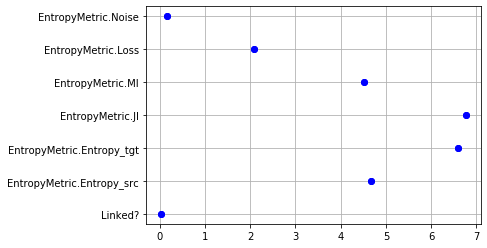

In [ ]:
#Information Measures
EDA.ci_bootstrapping(df = EDA.entropy_set, samples=10000, conf=0.95 )

2021-03-10 03:24:52,741 : INFO : Linked? : (1.0, 1.0, 1.0, 0.0)
2021-03-10 03:24:53,212 : INFO : EntropyMetric.Entropy_src : (4.94, 4.94, 4.94, 0.0)
2021-03-10 03:24:53,672 : INFO : EntropyMetric.Entropy_tgt : (6.72, 6.72, 6.72, 0.0)
2021-03-10 03:24:54,135 : INFO : EntropyMetric.JI : (6.87, 6.87, 6.87, 0.0)
2021-03-10 03:24:54,607 : INFO : EntropyMetric.MI : (4.79, 4.79, 4.79, 0.0)
2021-03-10 03:24:55,079 : INFO : EntropyMetric.Loss : (1.93, 1.93, 1.93, 0.0)
2021-03-10 03:24:55,545 : INFO : EntropyMetric.Noise : (0.16, 0.16, 0.16, 0.0)
2021-03-10 03:24:59,416 : INFO : Linked? : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:25:03,323 : INFO : EntropyMetric.Entropy_src : (4.68, 4.68, 4.68, 0.0)
2021-03-10 03:25:07,163 : INFO : EntropyMetric.Entropy_tgt : (6.59, 6.59, 6.59, 0.0)
2021-03-10 03:25:11,017 : INFO : EntropyMetric.JI : (6.76, 6.76, 6.76, 0.0)
2021-03-10 03:25:14,901 : INFO : EntropyMetric.MI : (4.51, 4.51, 4.51, 0.0)
2021-03-10 03:25:18,764 : INFO : EntropyMetric.Loss : (2.08, 2.08, 2.08

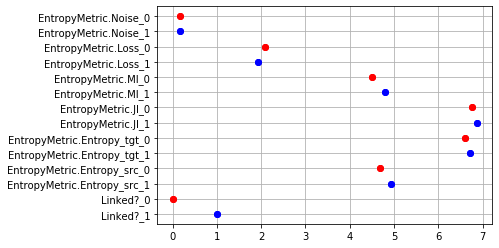

In [ ]:
EDA.ci_bootstrapping(
    df = EDA.entropy_set, samples=10000, conf=0.95, byLink = True )

### Shared Information

2021-03-10 03:25:26,678 : INFO : Linked? : (0.03, 0.03, 0.03, 0.0)
2021-03-10 03:25:30,500 : INFO : EntropyMetric.MSI_I : (nan, nan, nan, nan)
2021-03-10 03:25:34,278 : INFO : EntropyMetric.MSI_X : (nan, nan, nan, nan)


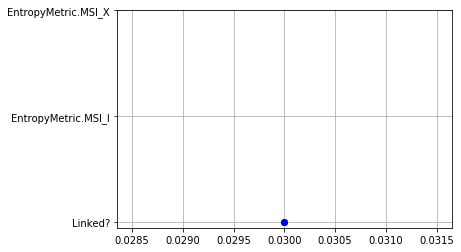

In [ ]:
#Shared Information
EDA.ci_bootstrapping(df = EDA.shared_set, samples=10000, conf=0.95 )

2021-03-10 03:25:34,919 : INFO : Linked? : (1.0, 1.0, 1.0, 0.0)
2021-03-10 03:25:35,393 : INFO : EntropyMetric.MSI_I : (nan, nan, nan, nan)
2021-03-10 03:25:35,862 : INFO : EntropyMetric.MSI_X : (nan, nan, nan, nan)
2021-03-10 03:25:39,713 : INFO : Linked? : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:25:43,560 : INFO : EntropyMetric.MSI_I : (nan, nan, nan, nan)
2021-03-10 03:25:47,453 : INFO : EntropyMetric.MSI_X : (nan, nan, nan, nan)


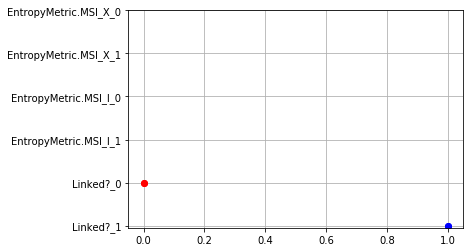

In [ ]:
EDA.ci_bootstrapping(
    df = EDA.shared_set, samples=10000, conf=0.95, byLink = True )

## [4] Standard Deviations
These tell you how the data is distributed around the mean . Big standard deviations tell you that some data points were pretty far from the mean.


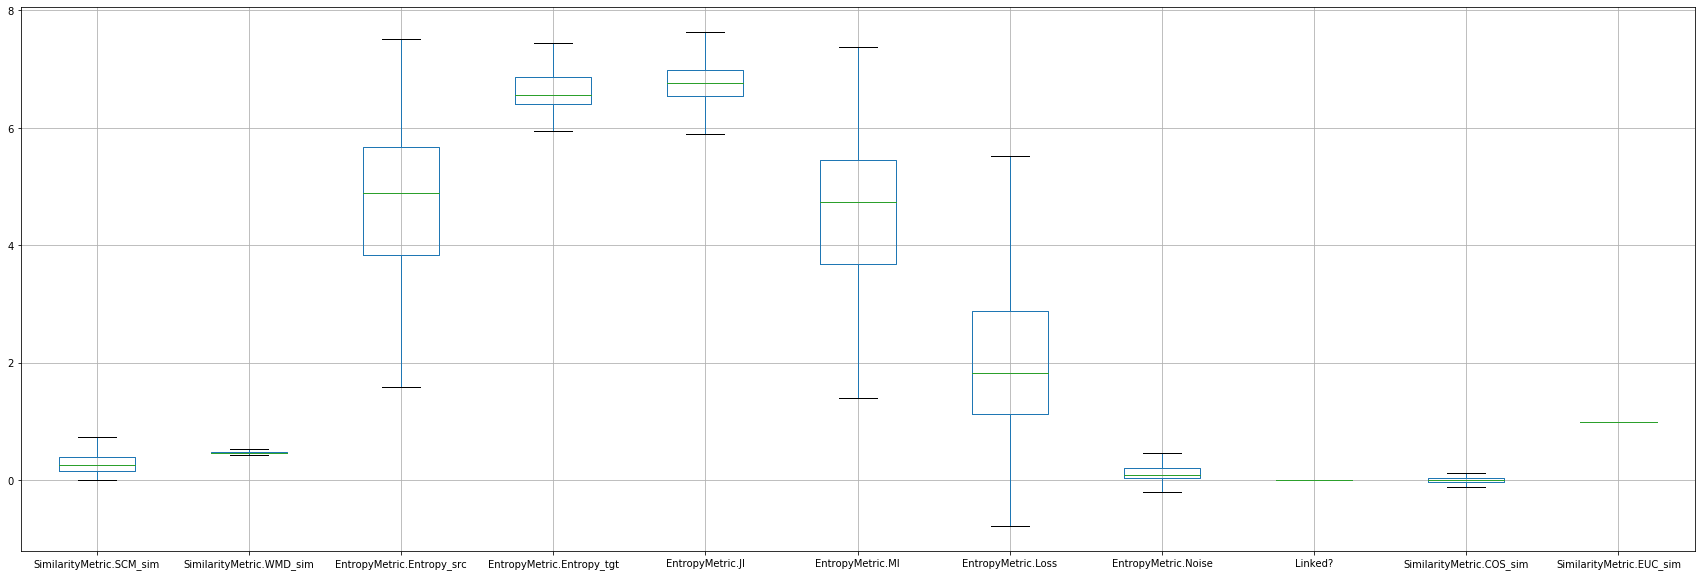

In [ ]:
EDA.manifoldEntropy.boxplot(figsize=[30, 10], showfliers=False) #Without Outliers

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28c18100f0>,
      dtype=object)

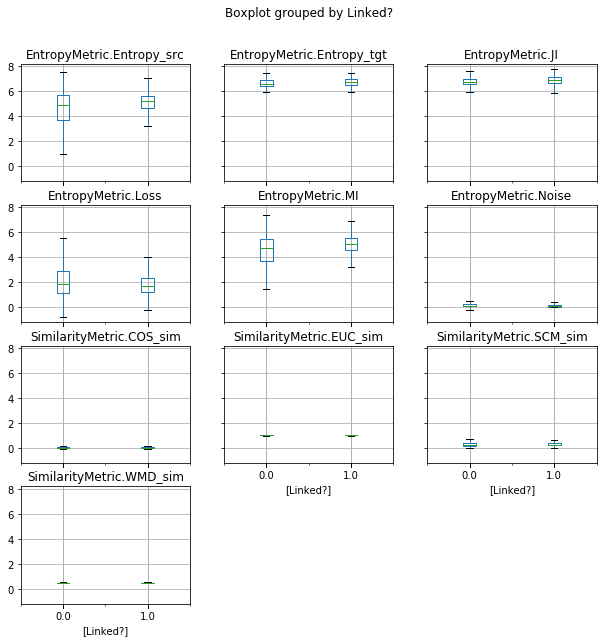

In [ ]:
#Deviations grouped by Ground Truth (GT)
EDA.manifoldEntropy.boxplot(by='Linked?',
                            figsize=[10, 10],
                            bootstrap = 10000,
                            meanline = True,
                            showfliers=False #Without Outliers
                           ) 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


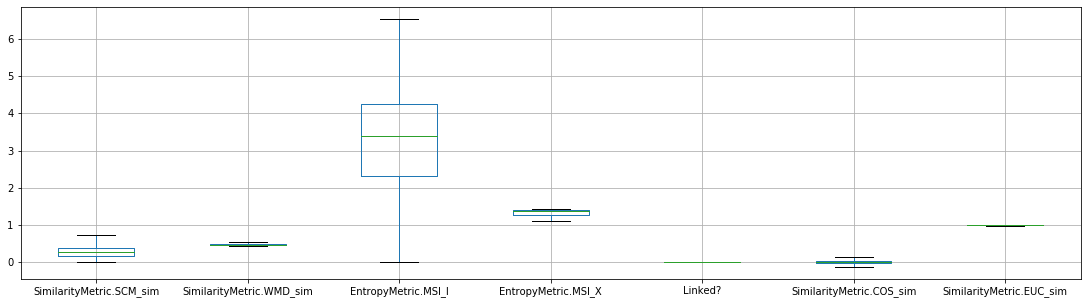

In [ ]:
EDA.sharedInfo.boxplot(figsize=[19, 5], showfliers=False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28c1a08240>,
      dtype=object)

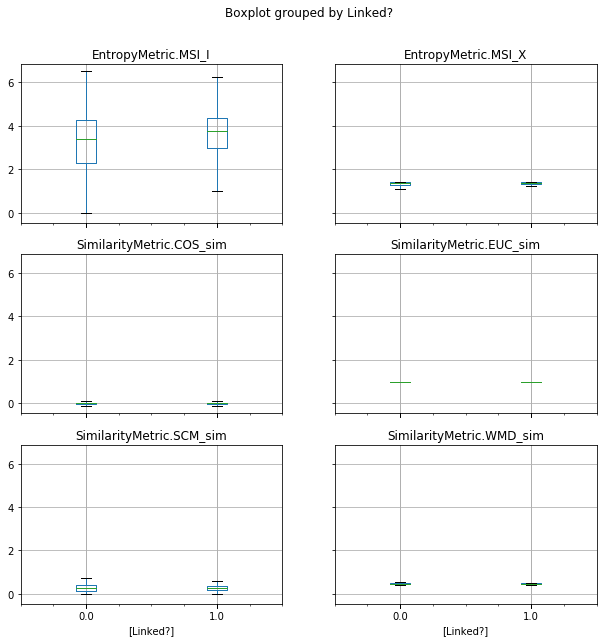

In [ ]:
#Deviations grouped by Ground Truth (GT)
EDA.sharedInfo.boxplot(by='Linked?',figsize=[10, 10], showfliers=False)

## [5] Scatter Matrix
Scatter matrix help us to identify correlations. However, the proper analysis is perform in the "Predictive notebook"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28c1147828>,
      dtype=object)

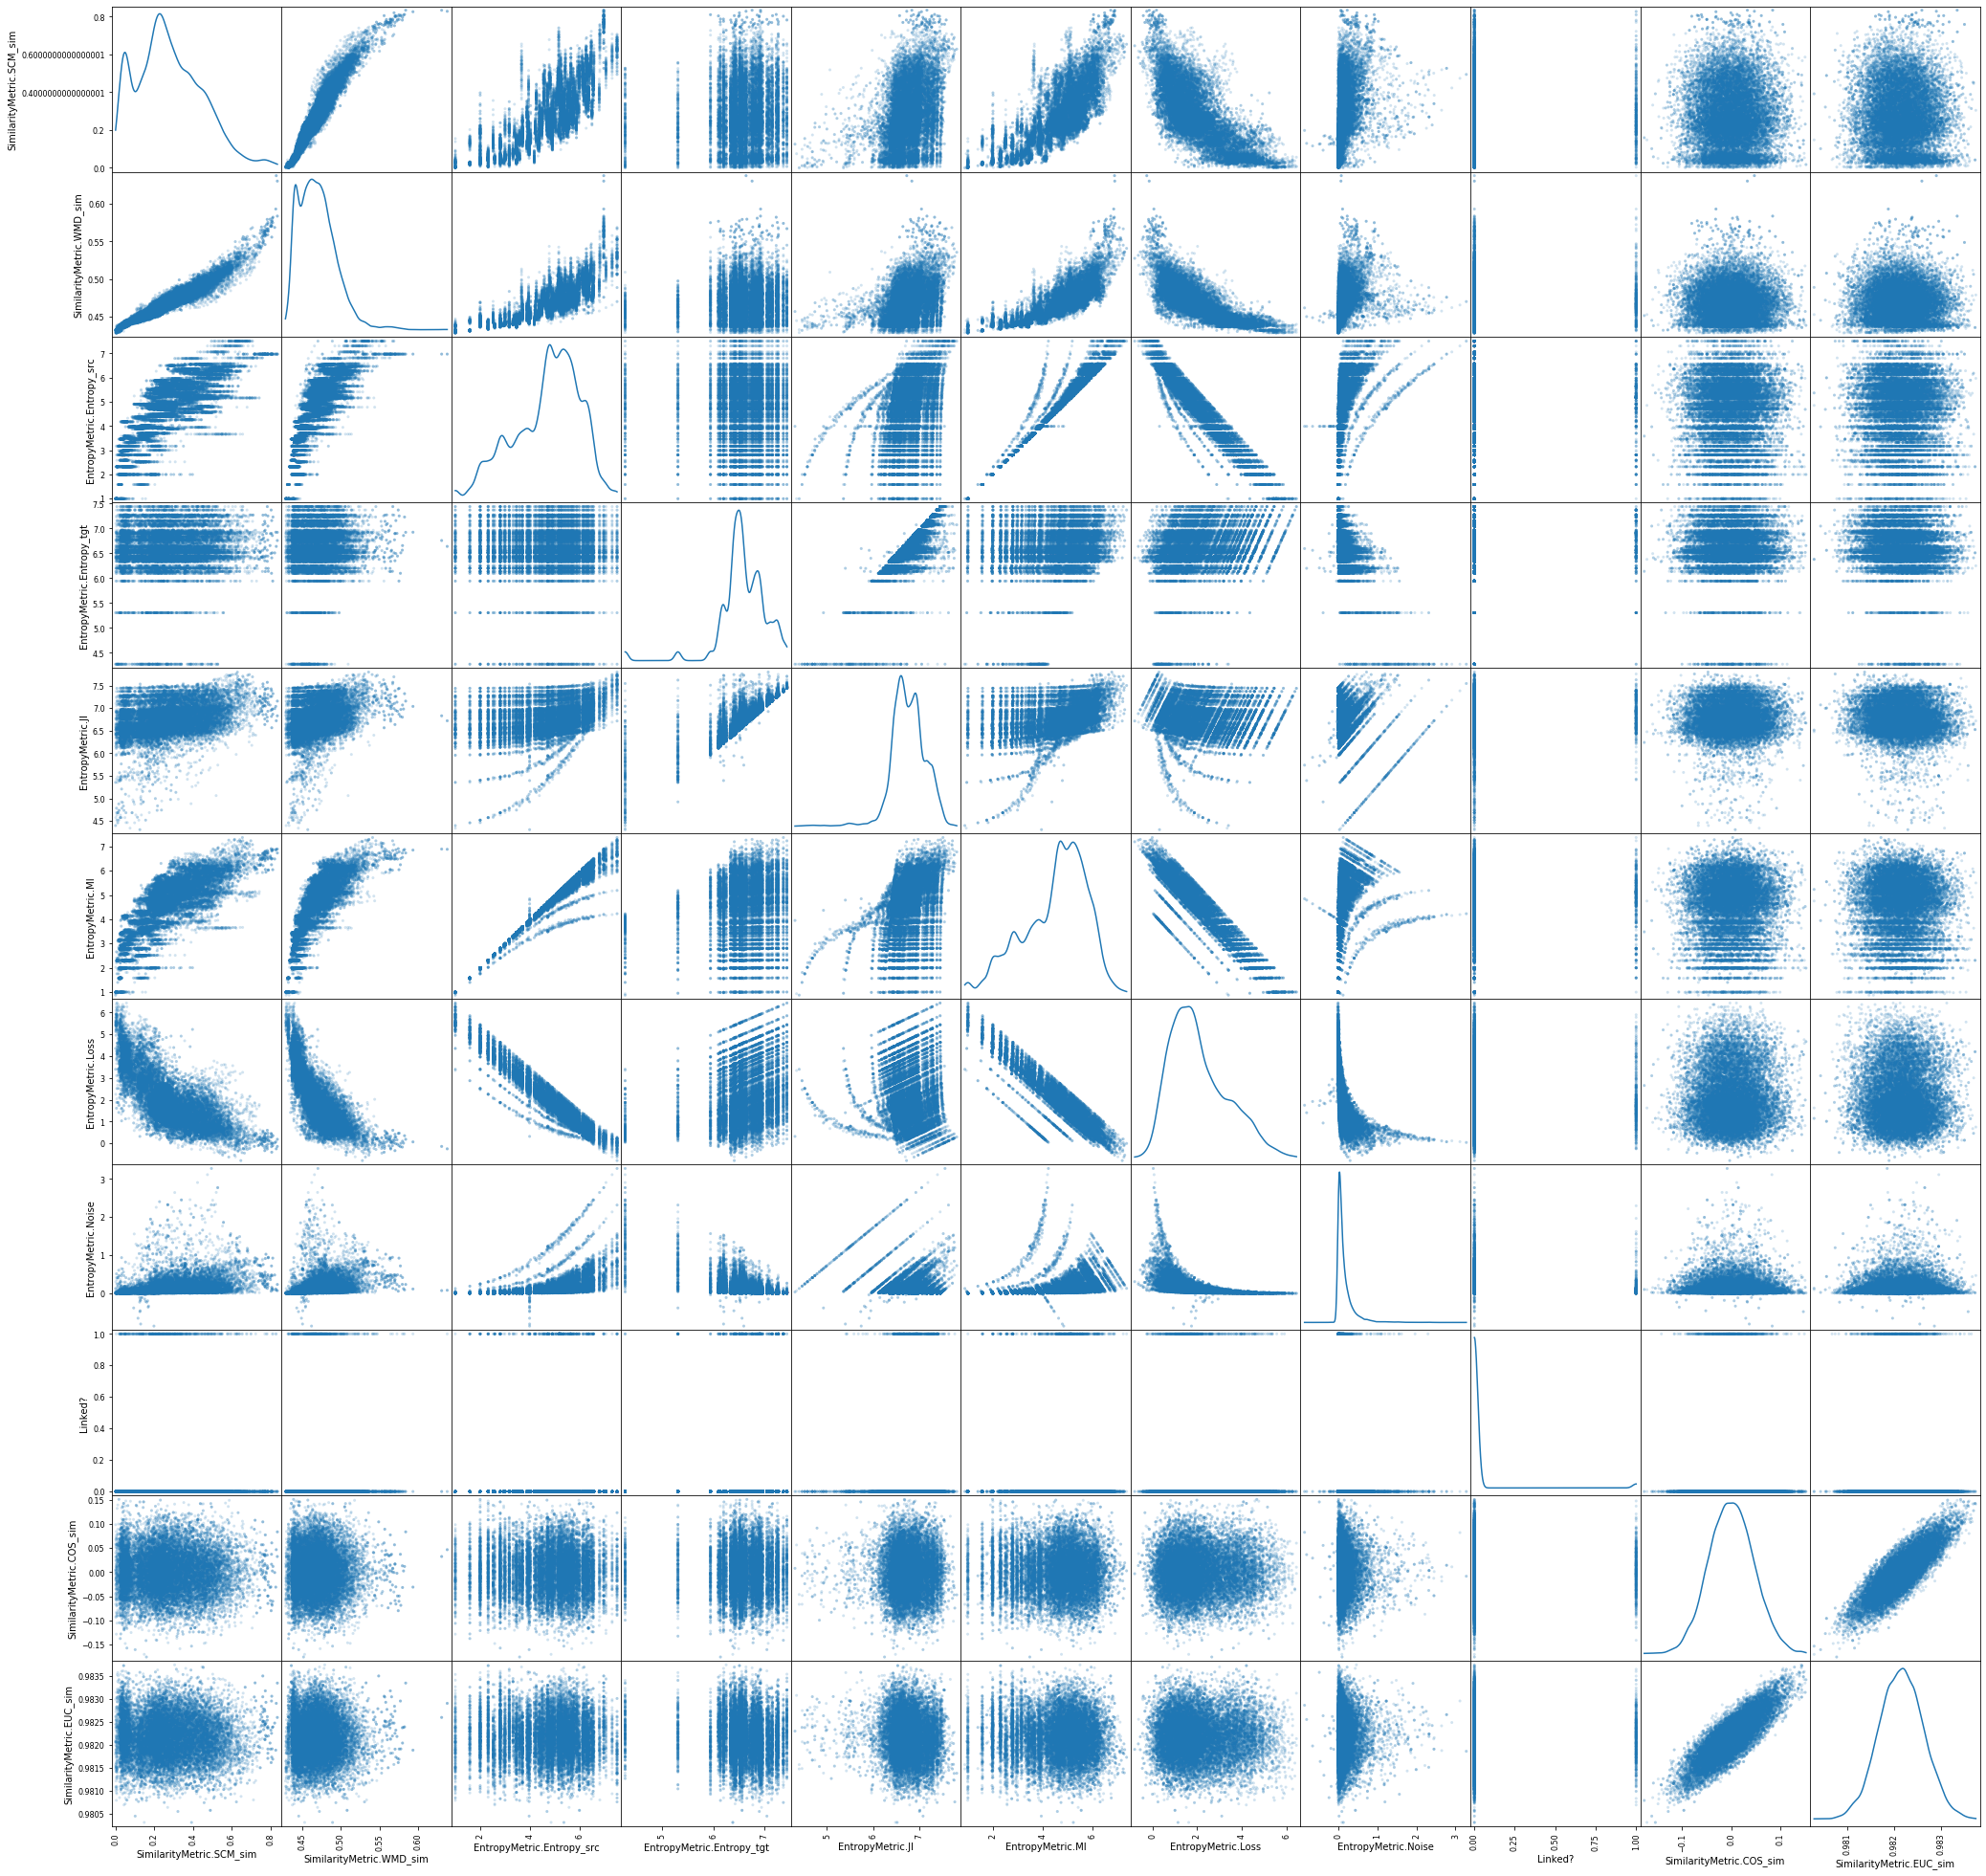

In [ ]:
scatter_matrix(EDA.manifoldEntropy, alpha=0.2, figsize=(35, 35), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28bd75a198>,
      dtype=object)

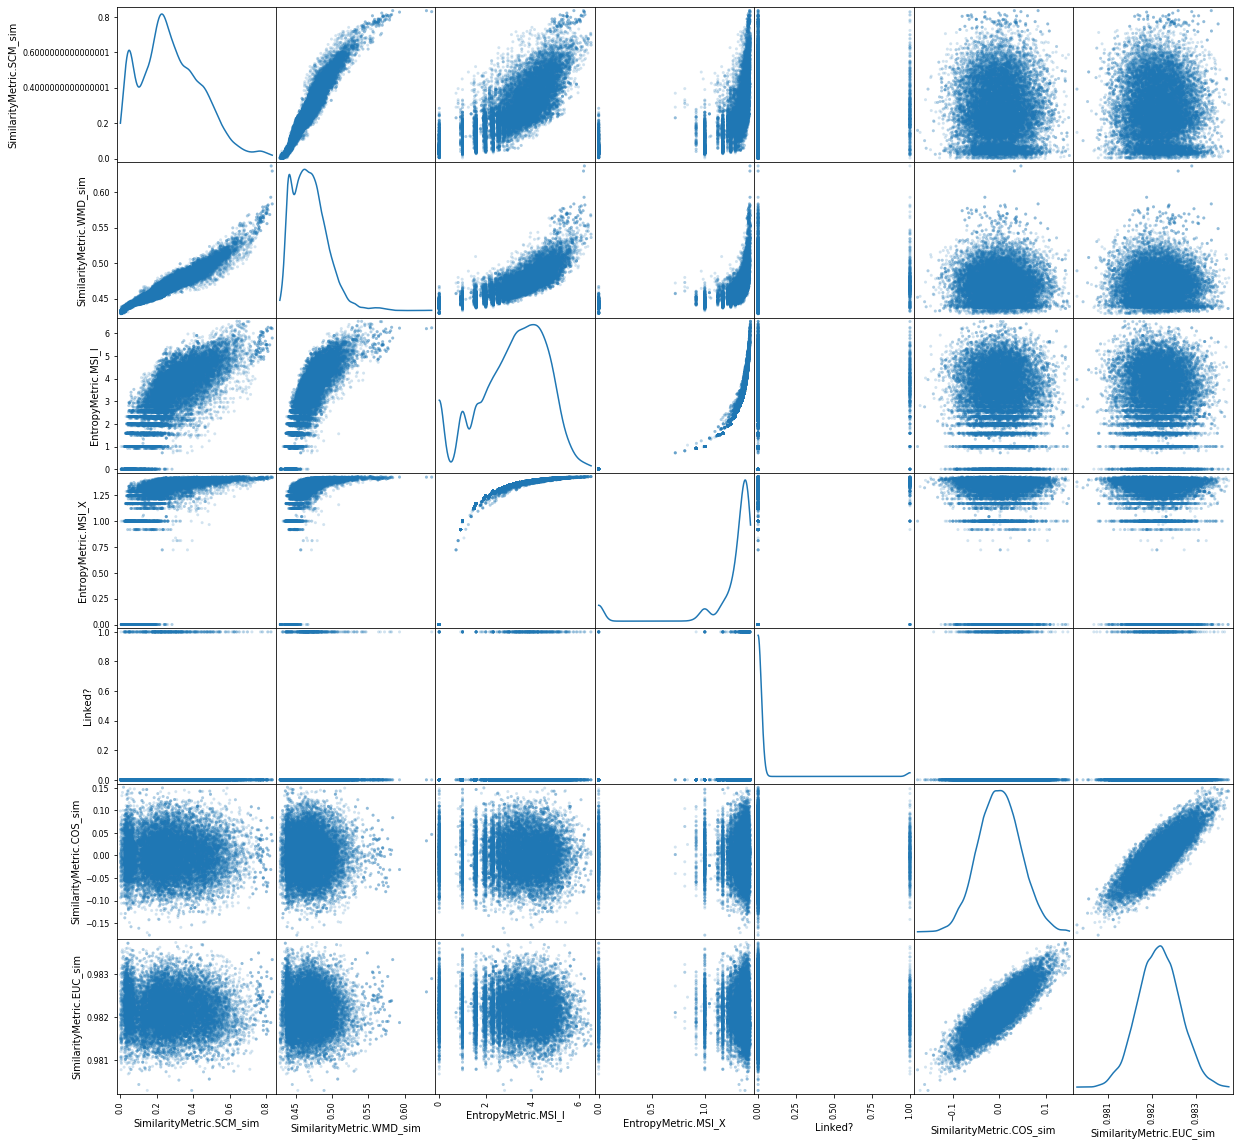

In [ ]:
scatter_matrix(EDA.sharedInfo, 
               alpha=0.2, 
               figsize=(20, 20), 
               diagonal='kde',
               #grid = True
              )

## [6] Auto Correlations
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

The shape of the lag plot can provide clues about the underlying structure of your data. For example:

A linear shape to the plot suggests that an autoregressive model is probably a better choice.
An elliptical plot suggests that the data comes from a single-cycle sinusoidal model.

Randomness
Creating a lag plot enables you to check for randomness. Random data will spread fairly evenly both horizontally and vertically. If you cannot see a pattern in the graph, your data is most probably random. On the other hand a shape or trend to the graph (like a linear pattern) indicates the data is not random

If your data shows a linear pattern, it suggests autocorrelation is present. A positive linear trend (i.e. going upwards from left to right) is suggestive of positive autocorrelation; a negative linear trend (going downwards from left to right) is suggestive of negative autocorrelation. The tighter the data is clustered around the diagonal, the more autocorrelation is present; perfectly autocorrelated data will cluster in a single diagonal line

### Similarity Measures

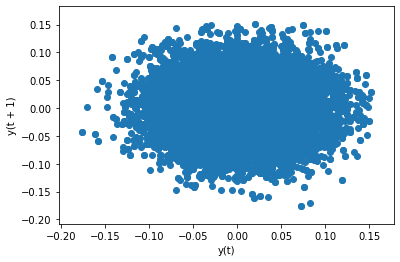

In [ ]:
lag_plot( EDA.similarity_set[['SimilarityMetric.COS_sim']] )

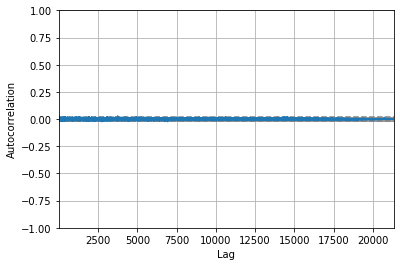

In [ ]:
pd.plotting.autocorrelation_plot(EDA.similarity_set[['SimilarityMetric.COS_sim']])

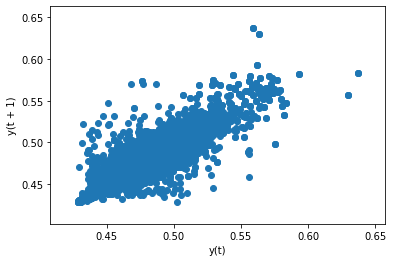

In [ ]:
lag_plot( EDA.similarity_set[['SimilarityMetric.WMD_sim']] )

### Info. Transmission Measures

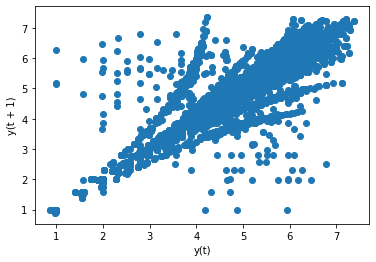

In [ ]:
lag_plot( EDA.entropy_set[['EntropyMetric.MI']] )

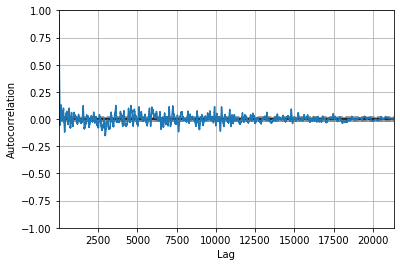

In [ ]:
pd.plotting.autocorrelation_plot(EDA.entropy_set[['EntropyMetric.MI']])

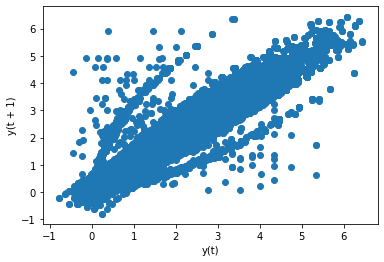

In [ ]:
lag_plot( EDA.entropy_set[['EntropyMetric.Loss']] )

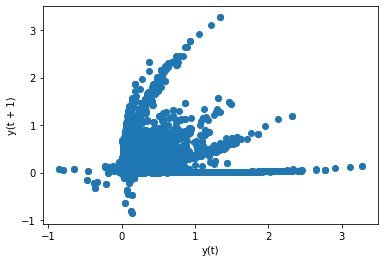

In [ ]:
lag_plot( EDA.entropy_set[['EntropyMetric.Noise']] )

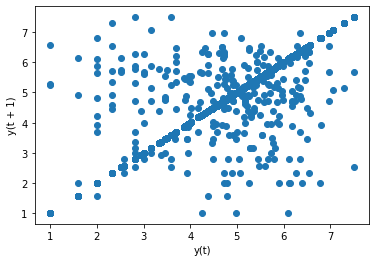

In [ ]:
lag_plot( EDA.entropy_set[['EntropyMetric.Entropy_src']] )

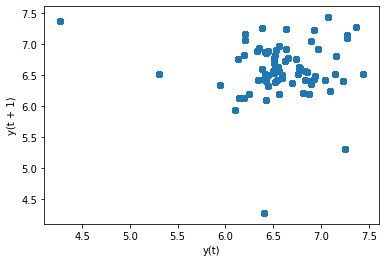

In [ ]:
lag_plot( EDA.entropy_set[['EntropyMetric.Entropy_tgt']] )

### Shared Measures

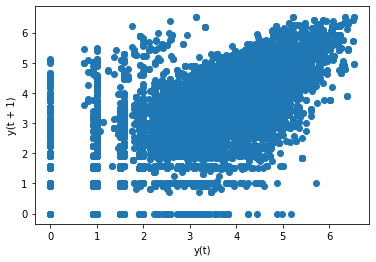

In [ ]:
lag_plot( EDA.shared_set[['EntropyMetric.MSI_I']] )

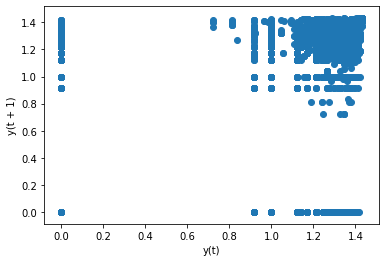

In [ ]:
lag_plot( EDA.shared_set[['EntropyMetric.MSI_X']] )

# Case Studies of Info Transmission Traceability
The goal of this section is to detect specific examples of odd traceability cases for a given dataset (or corpus). For instance, edge cases (min max), imbalanced data, or orphan links. 

## Case 0: Overlapping Information
This study shows potential overlaps on artifacts by measures the Minimum Shared Information Entropy (MSI_I). Ideally, lower values of MSI means that the link should not exist. Conversely, higher values of MSI means that there are enough conditions for the link to exist. 

In [ ]:
## MAX MSI_I
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MSI_I']==EDA.df_w2v['EntropyMetric.MSI_I'].max()][['Source','Target','EntropyMetric.MSI_I','Linked?']].values

array([[256,
        'sacp-python-common/sacp_python_common/spotbugs/spotbugs.py',
        6.527019696855936, 0.0],
       [56, 'sacp-python-common/sacp_python_common/spotbugs/spotbugs.py',
        6.527019696855936, 0.0]], dtype=object)

In [ ]:
## MIN MSI_I
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MSI_I']==EDA.df_w2v['EntropyMetric.MSI_I'].min()][['Source','Target','EntropyMetric.MSI_I','Linked?']].values

array([[295, 'sacp-python-common/sacp_python_common/fireException.py',
        0.0, 0.0],
       [274, 'sacp-python-common/sacp_python_common/fireException.py',
        0.0, 0.0],
       [274,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        0.0, 0.0],
       ...,
       [6,
        'sacp-python-common/test/python/third_party/unused/test_bd_image.py',
        0.0, 0.0],
       [5, 'sacp-python-common/sacp_python_common/fireException.py', 0.0,
        0.0],
       [2, 'sacp-python-common/sacp_python_common/fireException.py', 0.0,
        0.0]], dtype=object)

#### Nan Cases of MSI
These cases are particularly relevant because show potential links that do not share any information at all

In [ ]:
df_nan_msi = EDA.df_w2v[np.isnan(EDA.df_w2v['EntropyMetric.MSI_I'])]

In [ ]:
df_nan_msi.head(2)

Source                                             Target  \
22      295  sacp-python-common/sacp_python_common/template...   
614     290  sacp-python-common/sacp_python_common/template...   

     DistanceMetric.WMD  SimilarityMetric.WMD_sim  DistanceMetric.SCM  \
22             1.228046                  0.448824            0.829921   
614            1.251859                  0.444078            0.868719   

     SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  EntropyMetric.MSI_X  \
22                   0.170079                  NaN                  NaN   
614                  0.131281                  NaN                  NaN   

     EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
22                    4.715814                   4.271371          5.503934   
614                   3.700440                   4.271371          4.969002   

     EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
22           3.483251            0.788120             1.232563      0.0  
614          3.002809            1.268562             0.697631      0.0

In [ ]:
df_nan_msi.describe()

Source  DistanceMetric.WMD  SimilarityMetric.WMD_sim  \
count  1169.000000         1169.000000               1169.000000   
mean    146.426005            1.285935                  0.437487   
std      84.001844            0.018810                  0.003598   
min       2.000000            1.228046                  0.428397   
25%      63.000000            1.274969                  0.435521   
50%     147.000000            1.283509                  0.437922   
75%     230.000000            1.296099                  0.439566   
max     295.000000            1.334282                  0.448824   

       DistanceMetric.SCM  SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  \
count         1169.000000               1169.000000                  0.0   
mean             0.961409                  0.038591                  NaN   
std              0.027808                  0.027808                  NaN   
min              0.818025                  0.000000                  NaN   
25%              0.951532                  0.022484                  NaN   
50%              0.967435                  0.032565                  NaN   
75%              0.977516                  0.048468                  NaN   
max              1.000000                  0.181975                  NaN   

       EntropyMetric.MSI_X  EntropyMetric.Entropy_src  \
count                  0.0                1169.000000   
mean                   NaN                   2.436153   
std                    NaN                   0.800143   
min                    NaN                   1.000000   
25%                    NaN                   2.000000   
50%                    NaN                   2.321928   
75%                    NaN                   2.947703   
max                    NaN                   5.240546   

       EntropyMetric.Entropy_tgt  EntropyMetric.JI  EntropyMetric.MI  \
count                1169.000000       1169.000000       1169.000000   
mean                    6.308449          6.384440          2.360161   
std                     0.625999          0.513080          0.734340   
min                     4.271371          4.400432          0.870938   
25%                     6.199442          6.266723          1.960034   
50%                     6.443189          6.469630          2.304256   
75%                     6.594538          6.636771          2.802432   
max                     7.438475          7.442145          4.369473   

       EntropyMetric.Loss  EntropyMetric.Noise      Linked?  
count         1169.000000          1169.000000  1169.000000  
mean             3.948288             0.075992     0.013687  
std              1.039974             0.165376     0.116237  
min              0.589935            -0.381064     0.000000  
25%              3.386633             0.014731     0.000000  
50%              3.992207             0.030495     0.000000  
75%              4.634689             0.060837     0.000000  
max              6.440922             1.559111     1.000000

In [ ]:
#Saving Positive Links [Warning]!!
df_nan_msi[df_nan_msi['Linked?']==1][['Source','Target','SimilarityMetric.WMD_sim']].to_csv('msi_i_sacp.csv')

## Case 1: Edge Cases of Self-Information
This study highlights the imbalance of information between the source and target artifacts.

#### Target Artifacts

In [ ]:
#Max Self Information
max_tgt =EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']==EDA.df_w2v['EntropyMetric.Entropy_tgt'].max()][['Target']].values
np.unique(max_tgt)

array(['sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py'],
      dtype=object)

In [ ]:
#Min Self Information
min_tgt = EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']==EDA.df_w2v['EntropyMetric.Entropy_tgt'].min()][['Target']].values
np.unique(min_tgt)

array(['sacp-python-common/sacp_python_common/template/__init__.py'],
      dtype=object)

In [ ]:
#.99 quantile for the Target Artifacts
#We can make variation of the quantile to retrieve more links/cases
np.unique(EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']>=EDA.df_w2v['EntropyMetric.Entropy_tgt'].quantile(.99)][['Target']].values)

array(['sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py'],
      dtype=object)

#### Source Artifacts

In [ ]:
#Max Self Information
max_src = EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_src']==EDA.df_w2v['EntropyMetric.Entropy_src'].max()][['Source']].values
np.unique(max_src)

array([ 56, 256])

In [ ]:
#Min Self Information
min_src = EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_src']==EDA.df_w2v['EntropyMetric.Entropy_src'].min()][['Source']].values
np.unique(min_src)

array([101, 113, 144])

In [ ]:
#.99 quantile for the Source Artifacts
np.unique(EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_src']>=EDA.df_w2v['EntropyMetric.Entropy_src'].quantile(.99)][['Source']].values)

array([ 56, 104, 256])

## Case 2: Minimum and maximum loss
This study presents edge cases for the entropy loss. This is useful to detect poorly documented target artifacts.

In [ ]:
##Max Loss
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']==EDA.df_w2v['EntropyMetric.Loss'].max()][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([[144,
        'sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py',
        6.4409220535156475, 0.0]], dtype=object)

In [ ]:
##Min Loss
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']==EDA.df_w2v['EntropyMetric.Loss'].min()][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([[256,
        'sacp-python-common/test/python/third_party/test_binary_scan_func.py',
        -0.7881119237560029, 0.0],
       [56,
        'sacp-python-common/test/python/third_party/test_binary_scan_func.py',
        -0.7881119237560029, 0.0]], dtype=object)

In [ ]:
#Quantile .99
EDA.df_w2v['EntropyMetric.Loss'].quantile(.99)

5.4097593848842

In [ ]:
#Quantile .99 Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']>=EDA.df_w2v['EntropyMetric.Loss'].quantile(.99)][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([[245,
        'sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py',
        5.442982177407715, 0.0],
       [241,
        'sacp-python-common/sacp_python_common/third_party/run_ipcentral_automation.py',
        5.441066460191367, 0.0],
       [240, 'sacp-python-common/sacp_python_common/bandit/bandit.py',
        5.468292566864713, 0.0],
       [240,
        'sacp-python-common/sacp_python_common/custom_scan/customScan.py',
        5.6713580747897625, 0.0],
       [240,
        'sacp-python-common/sacp_python_common/spotbugs/spotbugs.py',
        5.647123432805118, 0.0],
       [240,
        'sacp-python-common/sacp_python_common/third_party/binary_scan_func.py',
        5.785965354629113, 1.0],
       [240,
        'sacp-python-common/sacp_python_common/third_party/binaryScan.py',
        5.690835839411781, 0.0],
       [240,
        'sacp-python-common/sacp_python_common/third_party/blackduck.py',
        5.5615513507595065, 1.0],
       [240,
      

## Case 3: Minimum and maximum noise
 This study presents edge cases for the entropy noise. This is useful to detect poorly documented source artifacts.

In [ ]:
## Max Noise
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']==EDA.df_w2v['EntropyMetric.Noise'].max()][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([[256,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        3.2755854377838935, 0.0],
       [56, 'sacp-python-common/sacp_python_common/template/__init__.py',
        3.2755854377838935, 0.0]], dtype=object)

In [ ]:
## Min Noise
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']==EDA.df_w2v['EntropyMetric.Noise'].min()][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([[213,
        'sacp-python-common/test/python/third_party/test_corona_lite.py',
        -0.8554215046967517, 0.0],
       [13,
        'sacp-python-common/test/python/third_party/test_corona_lite.py',
        -0.8554215046967517, 0.0]], dtype=object)

In [ ]:
#Quantile .99
EDA.df_w2v['EntropyMetric.Noise'].quantile(.99)

1.2561274592559115

In [ ]:
#Quantile .99 Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']>=EDA.df_w2v['EntropyMetric.Noise'].quantile(.99)][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([[294, 'sacp-python-common/sacp_python_common/fireException.py',
        1.8629847687869392, 0.0],
       [294,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        2.7723782025466828, 0.0],
       [293, 'sacp-python-common/sacp_python_common/fireException.py',
        1.5568634619790247, 0.0],
       [293,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        2.450439859254037, 0.0],
       [287, 'sacp-python-common/sacp_python_common/fireException.py',
        1.4997966334363737, 0.0],
       [287,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        2.3241660199072687, 0.0],
       [289, 'sacp-python-common/sacp_python_common/fireException.py',
        1.488877594729738, 0.0],
       [289,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        2.322786553536345, 0.0],
       [291, 'sacp-python-common/sacp_python_common/fireException.py',
        1.3131855119020273, 0.0],
       [29

## Case 4: Orphan informative links
This study points out a set of informative links that are not found in the ground truth. 


In [ ]:
##Max Mutual Information
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']==EDA.df_w2v['EntropyMetric.MI'].min()][['Source','Target','EntropyMetric.MI','Linked?']].values

array([[144,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        0.8709383318432238, 0.0],
       [101,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        0.8709383318432238, 0.0]], dtype=object)

In [ ]:
##Min Mutual Information
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']==EDA.df_w2v['EntropyMetric.MI'].min()][['Source','Target','EntropyMetric.MI','Linked?']].values

array([[144,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        0.8709383318432238, 0.0],
       [101,
        'sacp-python-common/sacp_python_common/template/__init__.py',
        0.8709383318432238, 0.0]], dtype=object)

In [ ]:
#Quantile .99
EDA.df_w2v['EntropyMetric.Noise'].quantile(.9999)

3.0861156753459142

In [ ]:
#Quantile .99 Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']>=EDA.df_w2v['EntropyMetric.MI'].quantile(.99)][['Source','Target','EntropyMetric.MI','Linked?']].values

array([[294, 'sacp-python-common/sacp_python_common/bandit/bandit.py',
        6.715950076981483, 0.0],
       [294,
        'sacp-python-common/sacp_python_common/csbcicd_report/csbcicd_func.py',
        6.844827667301514, 1.0],
       [294,
        'sacp-python-common/sacp_python_common/custom_scan/customScan.py',
        6.781270666891795, 0.0],
       [294,
        'sacp-python-common/sacp_python_common/gosec/gosec_report.py',
        6.736062332437975, 1.0],
       [294,
        'sacp-python-common/sacp_python_common/harden_check/harden_func.py',
        6.682231254946543, 0.0],
       [294, 'sacp-python-common/sacp_python_common/psb_mapping.py',
        6.731267342923955, 1.0],
       [294,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push.py',
        6.776615716083629, 0.0],
       [294,
        'sacp-python-common/sacp_python_common/security_results_push/security_results_push_func.py',
        6.853678487958162, 1.0],
       [294,
     

### Random Inspections on the Corpus

In [ ]:
EDA.df_w2v.head(1)

Source                                             Target  \
0     295  sacp-python-common/sacp_python_common/auth_uti...   

   DistanceMetric.WMD  SimilarityMetric.WMD_sim  DistanceMetric.SCM  \
0            1.181488                  0.458403             0.75325   

   SimilarityMetric.SCM_sim  EntropyMetric.MSI_I  EntropyMetric.MSI_X  \
0                   0.24675             3.022055             1.335963   

   EntropyMetric.Entropy_src  EntropyMetric.Entropy_tgt  EntropyMetric.JI  \
0                   4.715814                   6.895876           6.97673   

   EntropyMetric.MI  EntropyMetric.Loss  EntropyMetric.Noise  Linked?  
0           4.63496            2.260916             0.080854      0.0

In [ ]:
EDA.df_sys.head(1)

ids                                               text type  \
0  295  Production Merge * Feed release name through t...   pr   

                                                conv  \
0  product merg feed releas name upload bom allow...   

                                               bpe8k  \
0  ['▁production', '▁mer', 'ge', '▁*', '▁feed', '...   

                                              bpe32k  \
0  ['▁production', '▁merge', '▁*', '▁feed', '▁rel...   

                                             bpe128k  
0  ['▁production', '▁merge', '▁*', '▁feed', '▁rel...

In [ ]:
EDA.df_w2v[EDA.df_w2v['Target']=='sacp-python-common/setup.py'][['Source','Target','EntropyMetric.Entropy_tgt','Linked?']].values

array([[295, 'sacp-python-common/setup.py', 6.56009527974789, 0.0],
       [294, 'sacp-python-common/setup.py', 6.56009527974789, 0.0],
       [293, 'sacp-python-common/setup.py', 6.56009527974789, 0.0],
       ...,
       [5, 'sacp-python-common/setup.py', 6.56009527974789, 0.0],
       [1, 'sacp-python-common/setup.py', 6.56009527974789, 0.0],
       [2, 'sacp-python-common/setup.py', 6.56009527974789, 0.0]],
      dtype=object)

In [ ]:
EDA.df_w2v[EDA.df_w2v['Source']==193][['Source','Target','EntropyMetric.Entropy_src','EntropyMetric.Entropy_tgt','Linked?']].values

array([[193, 'sacp-python-common/sacp_python_common/auth_utility.py',
        6.368944617565194, 6.8958757628158684, 1.0],
       [193, 'sacp-python-common/sacp_python_common/bandit/bandit.py',
        6.368944617565194, 7.046810312550397, 0.0],
       [193,
        'sacp-python-common/sacp_python_common/bandit/banditReport.py',
        6.368944617565194, 6.426571231608992, 0.0],
       [193, 'sacp-python-common/sacp_python_common/cave/caveCa.py',
        6.368944617565194, 6.098070142413433, 0.0],
       [193, 'sacp-python-common/sacp_python_common/cave/caveSsl.py',
        6.368944617565194, 5.941919007331087, 0.0],
       [193, 'sacp-python-common/sacp_python_common/cave/caveZap.py',
        6.368944617565194, 6.33899069760295, 0.0],
       [193,
        'sacp-python-common/sacp_python_common/csbcicd_report/aggregator.py',
        6.368944617565194, 6.424670910428787, 0.0],
       [193,
        'sacp-python-common/sacp_python_common/csbcicd_report/csbcicd_func.py',
        6.3689446

In [ ]:
########################################### 

### Deployment

In [ ]:
! nbdev_build_docs #<-------- [Activate when stable]

In [ ]:
! nbdev_build_lib

In [ ]:
from nbdev.export import notebook2script
notebook2script()

In [ ]:
#! pip install -e .